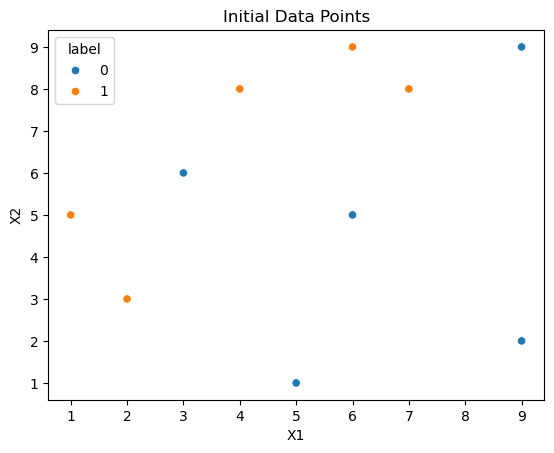

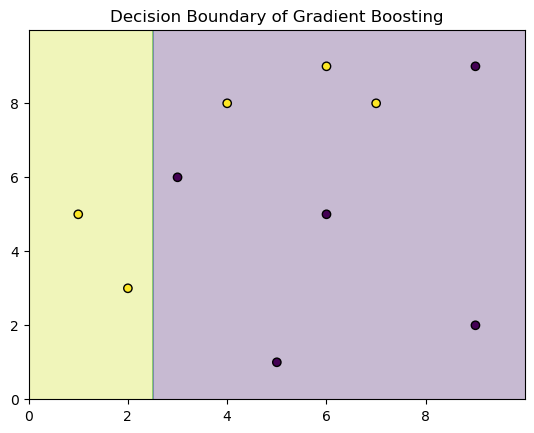

Prediction for query [1, 5]: 1
Prediction for query [9, 9]: 0


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

df = pd.DataFrame()
df['X1'] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df['X2'] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df['label'] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]

sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])
plt.title("Initial Data Points")
plt.show()

X = df[['X1', 'X2']].values
y = df['label'].values

gb_model = GradientBoostingClassifier(n_estimators=2, max_depth=1, random_state=42)
gb_model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = gb_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("Decision Boundary of Gradient Boosting")
plt.show()

query1 = np.array([1, 5]).reshape(1, -1)
query2 = np.array([9, 9]).reshape(1, -1)
pred_query1 = gb_model.predict(query1)
pred_query2 = gb_model.predict(query2)

print(f"Prediction for query [1, 5]: {pred_query1[0]}")
print(f"Prediction for query [9, 9]: {pred_query2[0]}")
